<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/master/02-perturbing-a-two-state-system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 - Perturbing a two state system

In this tutorial we are going to explore what happens if we connect a two state system to the "outside world". Or, put another way, what happens when we perturb a two state system?

A reminder that frequency ad energy have the same unnits here

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qutip import *

## note, if you start getting errors when using pandas with complex numbers then update Pandas
## - there was a bug that's been recently fixed https://github.com/pandas-dev/pandas/issues/27484

## 2.1 Static perturbation

Last time we looked at an isolated two state system whose energies were identical. The hamiltonian for this system looked like this


$$
H = \begin{bmatrix}
 E_0  &  0  \\
 0  &  E_0  \\
\end{bmatrix} = E_0 I
$$

where $I$ is the identity matrix.

When we allowed the possibility that the two states could be coupled (qm tunneling) i.e. the Hamiltonian looks like:
$$
H = \begin{bmatrix}
 E_0  &  -A  \\
 -A  &  E_0  \\
\end{bmatrix} = E_0 I - A \sigma_x
$$

We discovered that the two energy states split apart, $E_0+A$ and $E_0-A$.

Now we are going to explore how this coupled two state system changes when we perturb it.



Now we introduce a perturbation to the energy of the two states which differentiates between the two states. E.g. Applying an electric field to a molecule with a permanent dipole moment.

$$
H = \begin{bmatrix}
 E_0 + \delta  &  -A  \\
 -A  &  E_0 - \delta  \\
\end{bmatrix} = E_0 I - A \sigma_x + \delta\sigma_z
$$

In effect we increase the energy of the |+> and lower the energy of the |->

In [3]:
def states_to_df(states,times):
    psi_plus = np.zeros(len(times),dtype="complex128")  # To store the amplitude of the |+> state
    psi_minus = np.zeros(len(times),dtype="complex128") # To store the amplitude of the |-> state

    for i, state in enumerate(states):
        psi_plus[i] = state[0][0][0]
        psi_minus[i] = state[1][0][0]

    return pd.DataFrame(data={"+":psi_plus, "-":psi_minus}, index=times)

In [19]:
plus = basis(2, 0)
minus = basis(2, 1)

in_phase = (plus + minus).unit()
out_phase = (plus - minus).unit()

We'll begin by taking the purturbation $\delta = 2A$.

We also start exactly as last time (in FigXXXX) with the system in the |+> state. Also same coupling as last time A=0.1

In [173]:
E0 = 1.0
delta = 0.2
A = 0.1

H = E0*qeye(2) - A*sigmax() + delta*sigmaz()

times = np.linspace(0.0, 70.0, 1000) 

# First let's get the evolution of the state when initialised as "in phase"
result = sesolve(H, plus, times)
df =  states_to_df(result.states, times)


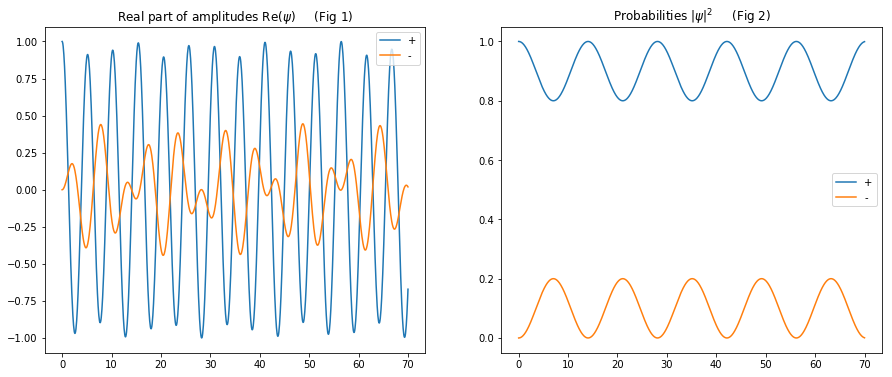

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df.plot(title="Real part of amplitudes Re($\psi$)     (Fig 1)", ax=axes[0]);
(df.abs()**2).plot(title="Probabilities $|\psi|^2$     (Fig 2)", ax=axes[1]);

Just as in the previous tutorial, we see Rabi oscillations in the probability because |+> and |-> are not stationary states. The behaviour is again like $\cos^2(\Omega t)$, but somewhat modified by the perturbation.
1. The period of oscillations has gone from 63 to about 29 (recall, A is the same)
2. Secondly, instead of a complete osciallation from 0 to 1 of both states, we see that we are more likely to find the state in |+>. 

We can understand 2 by recalling that the perturbation creates an energy difference between the |+> and |->.  We can think of the perturbation as a barrier between the two states - the larger the barrier, the less effective the coupling between the states will be and the more likely you'll stay in the state you started in.

To understand 1 we recall that the Rabi frequency arrises as the beating between the different frequencies of the stationary states, i.e. $\Omega = \Delta E/2$. We therefore need to calculate the energy of the stationary states, i.e. we need to calculate the eigenvalues of the Hamiltonian.

Let's do this for a number of different perturbation strengths:

In [176]:
n_deltas = 50
smallest_delta = 0.01
deltas = smallest_delta*np.array(range(0,n_deltas))
upper = np.zeros(n_deltas)
lower = np.zeros(n_deltas)

for i, d in enumerate(deltas):
    H_delta = E0*qeye(2) - A*sigmax() + d*sigmaz()
    E = H_delta.eigenenergies()
    upper[i] = E[1]
    lower[i] = E[0]
energies = pd.DataFrame(data={"up":upper, "low":lower, "$\delta$/A":deltas/A})

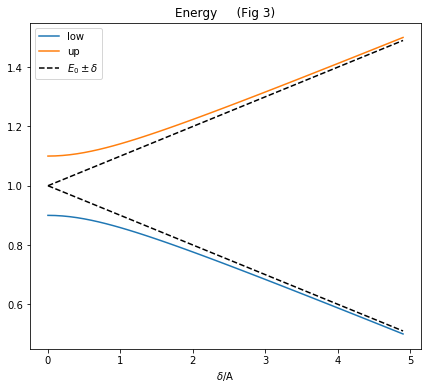

In [177]:
energies.plot(x="$\delta$/A", title="Energy     (Fig 3)", figsize=(7,6));
plt.plot((deltas/A),(E0+deltas),'k--')
plt.plot((deltas/A),(E0-deltas),'k--',label="$E_0 \pm \delta$");
plt.legend();

Let's see if Fig 3 makes sense. 

In the extreme, as $\delta\rightarrow \infty$, the energy asymptotically approaches to $E_0 \pm \delta$ - this is consistent with the coupling becoming less and less important. At the other extreme, $\delta \rightarrow 0$ we recover the result from the last tutorial, i.e. $E_0 \pm A$.

The form of the energy curve is actually a relatively simple formula $E_0 \pm \sqrt{A^2 + \delta^2}$ (we won't derive this result here, but instead link you to a [lecture from Richard Feynman](https://www.feynmanlectures.caltech.edu/III_09.html#Ch9-S2)). From this we can now calculate $\Omega = \Delta E/2 = \sqrt{A^2 + \delta^2} = \sqrt{0.1^2 + 0.2^2} = 0.22$ giving a Rabi oscillation period of $2\pi/\Omega = 29$ that we saw graphically in Fig 2.





It's also instructive to see how the stationary states themselves have changed due to the perturbation

In [178]:
H.eigenstates()

(array([0.7763932, 1.2236068]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.22975292]
  [-0.97324899]],
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.97324899]
  [ 0.22975292]]], dtype=object))

We see that the lower energy state is symmetric as in the previous tutorial (i.e both have the same sign) and we have less of the energetically expensive |+> state and more of the |->.

Other than the symmetry, there isn't much similarity with the stationary states from the last tutorial. This makes sense when we recall that $\delta=2A$ - it's a strong perturbation so it changes the system a lot.

There is some really interesting physics that happens when we don't perturb the system too much, i.e $\delta/A \ll 1$, so we are going to explore this regime next in the context of time dependent perturbation.

## 2.2 Time dependent perturbation

Now let's consider a time dependent perturbation of the form $\delta\cos(\omega t)$. With QuTiP, we can add [time dependence in several ways](http://qutip.org/docs/latest/guide/dynamics/dynamics-time.html#function-based-time-dependence)

### Resonance

We do expect something interesting to happen when the frequency of the perturbation $\omega$ matches the frequency difference of the unpertubed states, i.e. when $\omega = \omega_0 \equiv 2A$

In [246]:
E0 = 1.0
delta = 0.001
A = 0.1

H0 = E0*qeye(2) - A*sigmax() 

H1 =  delta*sigmaz()

H = [H0,[H1,'cos(0.2*t)']]

times = np.linspace(0.0, 15000.0, 1000) 

result = sesolve(H, in_phase, times)
df =  states_to_df(result.states, times)


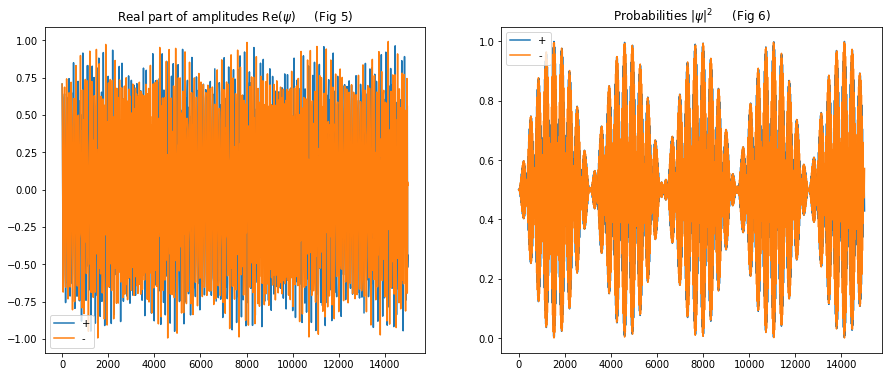

In [247]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df.plot(title="Real part of amplitudes Re($\psi$)     (Fig 5)", ax=axes[0]);
(df.abs()**2).plot(title="Probabilities $|\psi|^2$     (Fig 6)", ax=axes[1]);

We can clearly see something interesting is happening, the probabilities are undergoing full oscillation from 1 to 0.

It is however, quite difficult to be more specific from this plot. That's because we are still using the |+> and |-> basis to describe the system. The best basis to work with is one in which the states are exactly, or at least close to, the stationary states.

Since we are perturbing the system only slightly, it makes sense to choose the basis to be the stationary states from unperturbed system, i.e. from the isolated two state system with coupled states. Let's rewrite them here for convenience:

$\frac{|+> + \,\  |->}{\sqrt{2}}$ - in phase (a.k.a symmetric)

$\frac{|+> - \,\  |->}{\sqrt{2}}$ - out of phase (a.k.a anti-symmetric)

Changing the basis of a state is actually very easy in QuTiP, we just take any state `s` and apply the [transform](http://qutip.org/docs/latest/apidoc/classes.html?highlight=transform#qutip.Qobj.transform) method to it `s.transform(new_base_states)`.

Each state vector needs to be transformed separately, so let's create a function to do this for the many states that comes from solving the Schrödinger equation.

In [248]:
def change_basis_to_df(states, times, new_basis, new_basis_labels):
    psi_new_basis_0 = np.zeros(len(times),dtype="complex128")  # To store the amplitude of the new_basis_0 state
    psi_new_basis_1 = np.zeros(len(times),dtype="complex128") # To store the amplitude of the new_basis_1 state

    for i, state in enumerate(states):
        transformed_state = state.transform(new_basis)
        psi_new_basis_0[i] = transformed_state[0][0][0]
        psi_new_basis_1[i] = transformed_state[1][0][0]

    return pd.DataFrame(data={new_basis_labels[0]:psi_new_basis_0, new_basis_labels[1]:psi_new_basis_1}, index=times)

In [249]:
df = change_basis_to_df(result.states, times, [in_phase,out_phase], ["in_phase", "out_phase"])

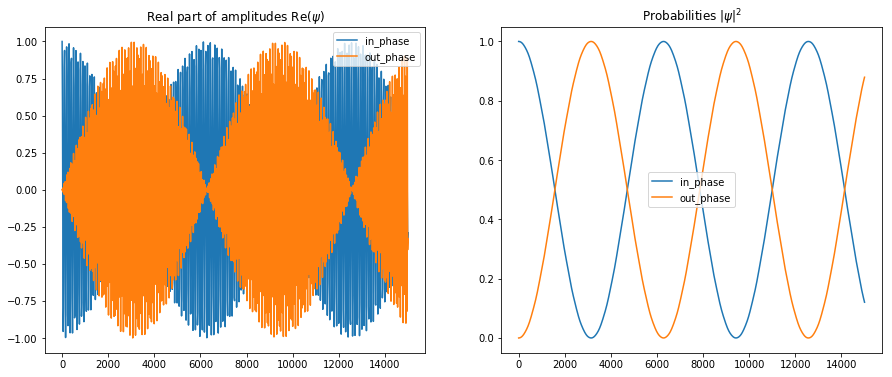

In [250]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df.plot(title="Real part of amplitudes Re($\psi$)", ax=axes[0]);
(df.abs()**2).plot(title="Probabilities $|\psi|^2$", ax=axes[1]);

Now, we can see the that even though we only perturb the system slightly, i.e $\delta/A = 0.1$ is small, when we resonantly perturb the system, we cause a significant change, i.e. we cause the the system to transition between higher an lower energy states - this is the essence of stimulated emission/absorption from atomic systems.


---

period even clearer now, it's determined by the size of $\delta$

$$
T = \frac{2\pi}{\delta} \approx 630
$$

### Off resonance

Let's change the frequency just a little bit to see how sensitive this resonance is. 

We'll make $(\omega-\omega_0)/\omega_0 = 1\%$ 

i.e $\omega=0.202$

In [238]:
E0 = 1.0
delta = 0.001
A = 0.1

H0 = E0*qeye(2) - A*sigmax() 

H1 =  delta*sigmaz()

H = [H0,[H1,'cos(0.202*t)']]

times = np.linspace(0.0, 15000.0, 1000) 

result = sesolve(H, in_phase, times)
df =  states_to_df(result.states, times)


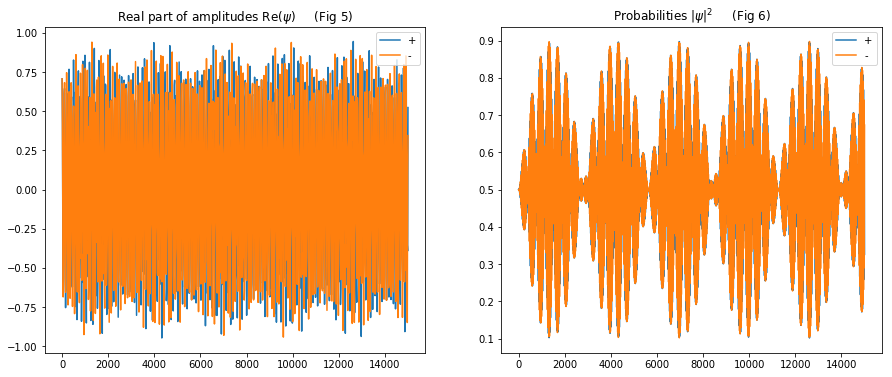

In [239]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df.plot(title="Real part of amplitudes Re($\psi$)     (Fig 5)", ax=axes[0]);
(df.abs()**2).plot(title="Probabilities $|\psi|^2$     (Fig 6)", ax=axes[1]);

Let's apply this function to the simulation we did with $(\omega-\omega_0)/\omega_0 = 1\%$

In [240]:
df = change_basis_to_df(result.states, times, [in_phase,out_phase], ["in_phase", "out_phase"])

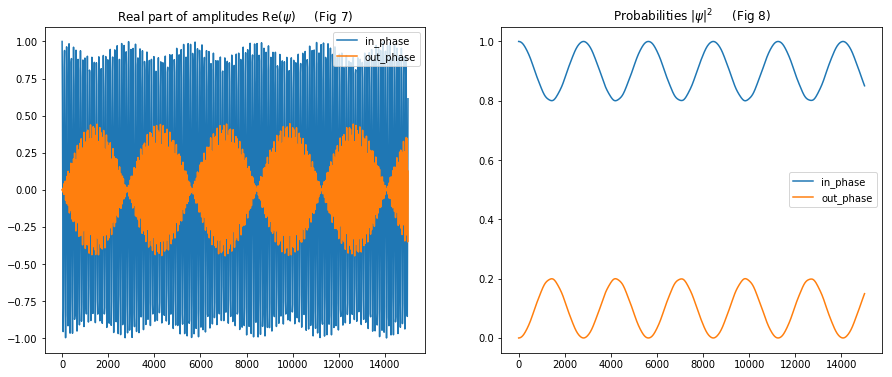

In [241]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df.plot(title="Real part of amplitudes Re($\psi$)     (Fig 7)", ax=axes[0]);
(df.abs()**2).plot(title="Probabilities $|\psi|^2$     (Fig 8)", ax=axes[1]);

In [251]:
Ht = (H0+H1).transform([in_phase,out_phase])

In [252]:
Ht

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[9.0e-01 1.0e-03]
 [1.0e-03 1.1e+00]]